# Graph Analysis
### Node degrees in graphs
The **degree** of a node (also called valency) is the number of edges connected to it. Let's define it for direcetd and undirected graphs separately:
 - **For undirected graphs:** Simply the number of edges incident to the node is the degree of the node, where each self-loop couunts as +2 (since both ends touch the node).
  - **For directed graphs:** For directed graphs (edges have direction), we distinguish:
      - **In-degree:** is the number of incoming edges to the node. 
      - **Out-degree:** is the number of outgoing edges from the node.

**Hint:** For directed graphs, each self-loop contributes +1 to the in-degree of the node and +1 to its out-degree.
<hr>   

One interesting fact about the degrees of a graph $G=(V,E)$ is called the **degree sum formula** (handshaking lemma):
 - $\sum_{v}deg(v)=2\cdot |E|$
 - $\sum_{v}deg_{in}(v)=\sum_{v}deg_{out}(v)=|E|$

Where $deg(v)$ denotes the degree of node $v$. $deg_{in}(v)$ refers to the in-degree of $v$. $deg_{out}(v)$ denotes the out-degree of $v$. And $|E|$ returns the number of elements of set $E$, which is the number of edges of the graph.

There is a relation between entries of **adjacency matrix** $A$ of a graph and its node degrees:
 - $deg(v)=\sum_j A_{v,j}$ (for an undirected graph)
 - $deg_{out}(v)=\sum_j A_{v,j}$, and $deg_{in}(v)=\sum_i A_{i,v}$ (for a directed graph)

<hr>

In the following, we give examples of directed and undirected graphs and their node degrees. Also, we get the node degrees from their adjacency matrix. Finally, we check the *degree sum formula* for the graphs.
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

deg(1) = 1, deg(2) = 3, deg(3) = 1, deg(4) = 1, 
Adjacency Matrix: (simple undirected graph)
[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 0]
 [0 1 0 0]]
Degrees from adjacency matrix: [1 3 1 1]


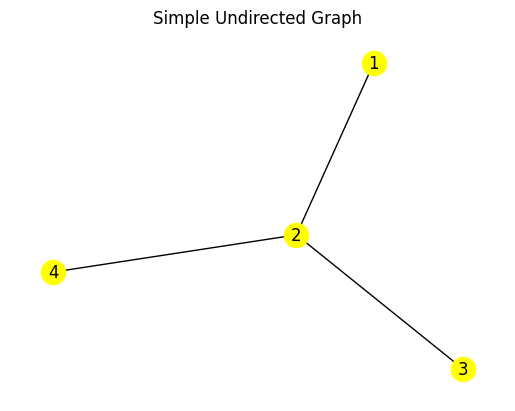

In [2]:
# Undirected graph
G_undir = nx.Graph([(1, 2), (2, 3), (2, 4)])

# Display the graph
pos=nx.spring_layout(G_undir)  # Position nodes nicely
plt.title('Simple Undirected Graph')
nx.draw(G_undir,pos,with_labels=True,node_color='yellow')

# Get the node degrees by NetworkX
for node,degree in dict(G_undir.degree).items():
    print(f'deg({node}) = {degree}',end=', ') 

# Get the adjacency matrix    
A_undir=nx.adjacency_matrix(G_undir).todense()
print(f'\nAdjacency Matrix: (simple undirected graph)\n{A_undir}')

# Compute degrees from adjacency matrix: row sums
degrees_from_matrix = np.sum(A_undir,axis=1) # (row-wise)
print("Degrees from adjacency matrix:", degrees_from_matrix)
plt.show()

in_deg(1) = 0, in_deg(2) = 3, in_deg(3) = 0, in_deg(4) = 1, 
out_deg(1) = 2, out_deg(2) = 0, out_deg(3) = 1, out_deg(4) = 1, 
Adjacency Matrix: (simple directed graph)
[[0 1 0 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]
In-degrees from adjacency matrix: [0 3 0 1]
out-degrees from adjacency matrix: [2 0 1 1]


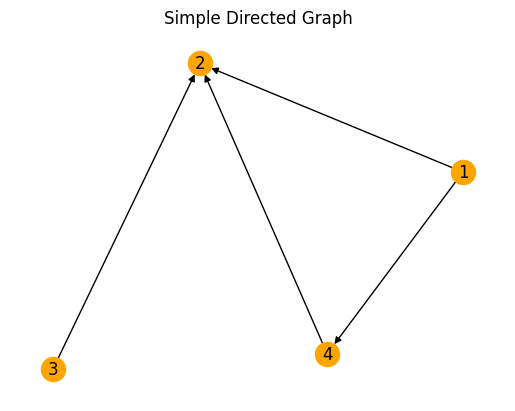

In [3]:
# Directed graph
G_dir = nx.DiGraph([(1, 2), (3, 2), (1, 4), (4, 2)])

# Display the graph
pos_dir=nx.spring_layout(G_dir)  # Position nodes nicely
plt.title('Simple Directed Graph')
nx.draw(G_dir,pos_dir,with_labels=True,node_color='orange')

# Get the node in-degrees and out-degrees by NetworkX
for node,degree in dict(G_dir.in_degree).items():
    print(f'in_deg({node}) = {degree}',end=', ')  
print('')
for node,degree in dict(G_dir.out_degree).items():
    print(f'out_deg({node}) = {degree}',end=', ')  

# Get the adjacency matrix of the graph
A_dir=nx.adjacency_matrix(G_dir).todense()
print(f'\nAdjacency Matrix: (simple directed graph)\n{A_dir}')

# Compute degrees from matrix: 
out_degrees_from_matrix = np.sum(A_dir,axis=1) # (row-wise)
in_degrees_from_matrix = np.sum(A_dir,axis=0) # (column-wise)
print("In-degrees from adjacency matrix:", in_degrees_from_matrix)
print("out-degrees from adjacency matrix:", out_degrees_from_matrix)

In [4]:
# Extra: checking the Degree Sum Formula
# For the undirected graph G_undir
# sum of degrees
SOD=sum([degree for node, degree in G_undir.degree])
no_edges=len(G_undir.edges)
print('Degree Sum formula (for an undirected graph):')
print(f'Sum of degrees = {SOD}')
print(f'Two * number_of_edges = {2*no_edges}')

# For the directed graph G_dir
# Sum of in-degrees
SOID=sum([indegree for node, indegree in G_dir.in_degree])
# Sum of out-degrees
SOOD=sum([outdegree for node, outdegree in G_dir.out_degree])

no_edges_dir=len(G_dir.edges)
print('-'*50)
print('Degree Sum formula (for a directed graph):')
print(f'Sum of in-degrees = {SOID}')
print(f'Sum of out-degrees = {SOOD}')
print(f'The number_of_edges = {no_edges_dir}')

Degree Sum formula (for an undirected graph):
Sum of degrees = 6
Two * number_of_edges = 6
--------------------------------------------------
Degree Sum formula (for a directed graph):
Sum of in-degrees = 4
Sum of out-degrees = 4
The number_of_edges = 4
